In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install --upgrade urllib3
!pip install py7zr

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/134.8 kB ? eta -:--:--
     ----- ------------------------------- 20.5/134.8 kB 330.3 kB/s eta 0:00:01
     ------------------------------- ------ 112.6/134.8 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 134.8/134.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.8 MB 7.0 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/8.8 MB 9.7 MB/s eta 0:00:01
   --------- ------------------------------ 2.1/8.8 MB 14.7 MB/s eta 0:00:01
   -------------- ------------------------- 3.2/8.8 MB 16.9 MB/s eta 0:00:01
   ------------------------ --------------- 5.5/8.8 MB 23.4 MB/s eta 0:00:01
   ----------------------------- ---------- 6.4/8.8 MB 22.8 MB/s eta 0:00:01
   --------------------------------- ------ 7.4/8.8 MB 21.4 MB/s eta 0:00:01
   


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached urllib3-2.0.7-py3-none-any.whl.metadata (6.6 kB)
Using cached urllib3-2.0.7-py3-none-any.whl (124 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.1
    Uninstalling urllib3-2.2.1:
      Successfully uninstalled urllib3-2.2.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyrebase4 4.7.1 requires requests<2.30,>=2.19.1, but you have requests 2.31.0 which is incompatible.
pyrebase4 4.7.1 requires urllib3<2,>=1.21.1, but you have urllib3 2.0.7 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached urllib3-2.2.1-py3-none-any.whl.metadata (6.4 kB)
Using cached urllib3-2.2.1-py3-none-any.whl (121 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
botocore 1.34.61 requires urllib3<2.1,>=1.25.4; python_version >= "3.10", but you have urllib3 2.2.1 which is incompatible.
pyrebase4 4.7.1 requires requests<2.30,>=2.19.1, but you have requests 2.31.0 which is incompatible.
pyrebase4 4.7.1 requires urllib3<2,>=1.21.1, but you have urllib3 2.2.1 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from datasets import load_dataset
from transformers import pipeline

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

In [3]:
device = 'gpu'
model_ckpt = 'facebook/bart-large-cnn'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

In [4]:
summary_data = load_dataset('gopalkalpande/bbc-news-summary')
summary_data

DatasetDict({
    train: Dataset({
        features: ['File_path', 'Articles', 'Summaries'],
        num_rows: 2224
    })
})

In [5]:
summary_data['train'][0]

{'File_path': 'politics',
 'Articles': 'Budget to set scene for election..Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour...Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about £2bn to spare...- Increase in the stamp duty threshold from £60,000. - A freeze on petrol duty. - An extension of tax credit scheme for poorer families. - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buye

In [6]:
article_len = [len(x['Articles'].split()) for x in summary_data['train']]
summary_len = [len(x['Summaries'].split()) for x in summary_data['train']]

In [7]:
import pandas as pd

df = pd.DataFrame([article_len, summary_len]).T
df.columns = ['Article Length', 'Summary Length']
df

,Article Length,Summary Length
0,532,192
1,496,266
2,533,225
3,490,223
4,435,185
...,...,...
2219,222,90
2220,394,180
2221,318,120
2222,401,197


array([[<Axes: title={'center': 'Article Length'}>,
        <Axes: title={'center': 'Summary Length'}>]], dtype=object)

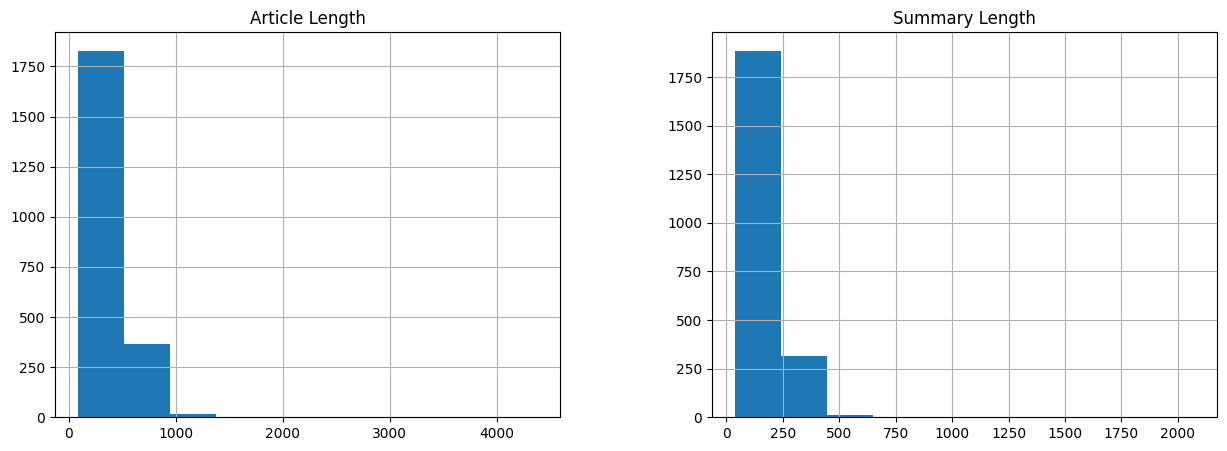

In [8]:
df.hist(figsize=(15,5))

In [9]:
#data collator

def get_feature(batch):
  encodings = tokenizer(batch['Articles'], text_target = batch['Summaries'],
                        max_length = 1024, truncation=True)
  encodings = {'input_ids': encodings['input_ids'],
               'attention_mask': encodings['attention_mask'],
               'labels': encodings['labels']}
  return encodings

In [10]:
summary_data_pt = summary_data.map(get_feature, batched=True)

In [11]:
summary_data_pt

DatasetDict({
    train: Dataset({
        features: ['File_path', 'Articles', 'Summaries', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2224
    })
})

In [12]:
columns = ['input_ids','labels','attention_mask']
summary_data_pt.set_format(type='torch',columns = columns)

In [13]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [14]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir = 'bart_summary',
    num_train_epochs=1,
    warmup_steps=500,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay = 0.01,
    logging_steps =10,
    evaluation_strategy='steps',
    eval_steps=500,
    save_steps=1e6,
    gradient_accumulation_steps=16
)

trainer = Trainer(model=model, args= training_args, tokenizer=tokenizer, data_collator=data_collator, train_dataset = summary_data_pt['train'])

C:\Users\Bristi Maity\AppData\Roaming\Python\Python312\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [15]:
trainer.train()

Step,Training Loss,Validation Loss


TrainOutput(global_step=34, training_loss=0.5447245170088375, metrics={'train_runtime': 26576.6957, 'train_samples_per_second': 0.084, 'train_steps_per_second': 0.001, 'total_flos': 3188386506866688.0, 'train_loss': 0.5447245170088375, 'epoch': 0.98})

In [16]:
trainer.save_model('bart_summarization_model')

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


In [21]:
#custom prediction
pipe = pipeline('summarization', model='bart_summarization_model')
gen_kwargs ={'length_penalty': 0.8, 'num_beams': 8,"max_length": 128}

custom_article ="""
Did you know that the world's largest desert is not the Sahara, but actually Antarctica? Antarctica is classified as a desert because it receives very little precipitation, with most parts receiving less than 200 millimeters (8 inches) of precipitation per year. Despite its icy landscape, Antarctica is considered a desert due to its low humidity and lack of rainfall. This makes it the largest desert on Earth by area, covering approximately 14 million square kilometers (5.4 million square miles).
"""
print(pipe(custom_article, **gen_kwargs))

Your max_length is set to 128, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)


[{'summary_text': "The world's largest desert is not the Sahara, but actually Antarctica. Antarctica is classified as a desert because it receives very little precipitation, with most parts receiving less than 200 millimeters (8 inches) of precipitation per year. This makes it the largest desert on Earth by area, covering approximately 14 million square kilometers (5.4 million square miles)"}]


In [22]:
!zip bart_summarization.zip -r bart_summarization_model_zip/

'zip' is not recognized as an internal or external command,
operable program or batch file.
